In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/water_network_leak_dataset.csv")

In [ ]:
df.head()

,Pipe_ID,Pressure_PSI,Flow_GPM,Velocity_FPS,Temperature_F,Pipe_Age_Years,Pipe_Material,Soil_Corrosivity,Leak_Class
0,P-1861,38.7,206.4,8.0,77,10,PVC,Low,1
1,P-354,64.2,89.5,4.2,66,3,HDPE,Low,0
2,P-1334,72.5,118.6,4.8,80,6,HDPE,Medium,0
3,P-906,65.2,121.3,3.3,76,4,Steel,High,0
4,P-1290,54.2,105.7,3.9,56,4,Steel,Low,0


In [ ]:
df = df.rename(columns={'Pressure_PSI': 'Pressure(Psi)','Flow_GPM':'Flow (GPM)','Velocity_FPS':'Velocity(FPS)','Temperature_F':'Temparetaure(F)',
                        'Pipe_Age_Years':'PipeAge(Years)'})
display(df.head())

,Pipe_ID,Pressure(Psi),Flow (GPM),Velocity(FPS),Temparetaure(F),PipeAge(Years),Pipe_Material,Soil_Corrosivity,Leak_Class
0,P-1861,38.7,206.4,8.0,77,10,PVC,Low,1
1,P-354,64.2,89.5,4.2,66,3,HDPE,Low,0
2,P-1334,72.5,118.6,4.8,80,6,HDPE,Medium,0
3,P-906,65.2,121.3,3.3,76,4,Steel,High,0
4,P-1290,54.2,105.7,3.9,56,4,Steel,Low,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pipe_ID           2000 non-null   object 
 1   Pressure(Psi)     2000 non-null   float64
 2   Flow (GPM)        2000 non-null   float64
 3   Velocity(FPS)     2000 non-null   float64
 4   Temparetaure(F)   2000 non-null   int64  
 5   PipeAge(Years)    2000 non-null   int64  
 6   Pipe_Material     2000 non-null   object 
 7   Soil_Corrosivity  2000 non-null   object 
 8   Leak_Class        2000 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 140.8+ KB


In [ ]:
df.describe()

,Pressure(Psi),Flow (GPM),Velocity(FPS),Temparetaure(F),PipeAge(Years),Leak_Class
count,2000.000000,2000.00000,2000.00000,2000.0000,2000.000000,2000.0000
mean,60.292500,131.76530,4.83855,67.0810,7.915000,0.2000
std,11.611736,47.37923,1.82929,9.9668,6.754005,0.4001
min,10.600000,64.70000,3.00000,50.0000,1.000000,0.0000
25%,58.000000,102.40000,3.60000,58.7500,3.000000,0.0000
50%,63.700000,115.15000,4.20000,67.0000,6.000000,0.0000
75%,67.600000,133.52500,4.90000,76.0000,9.000000,0.0000
max,84.300000,317.30000,10.00000,84.0000,29.000000,1.0000


In [ ]:
df.isnull().sum()

,0
Pipe_ID,0
Pressure(Psi),0
Flow (GPM),0
Velocity(FPS),0
Temparetaure(F),0
PipeAge(Years),0
Pipe_Material,0
Soil_Corrosivity,0
Leak_Class,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in df[['Pipe_ID','Pipe_Material','Soil_Corrosivity']]:
  label_encoder=LabelEncoder()
  df[i]=label_encoder.fit_transform(df[i])

In [ ]:
df.head()

,Pipe_ID,Pressure(Psi),Flow (GPM),Velocity(FPS),Temparetaure(F),PipeAge(Years),Pipe_Material,Soil_Corrosivity,Leak_Class
0,1047,38.7,206.4,8.0,77,10,2,1,1
1,1354,64.2,89.5,4.2,66,3,1,1,0
2,467,72.5,118.6,4.8,80,6,1,2,0
3,1906,65.2,121.3,3.3,76,4,3,0,0
4,419,54.2,105.7,3.9,56,4,3,1,0


In [ ]:
x=df.iloc[:,0:8]
y = df["Leak_Class"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10) # Changed random_state

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)
class_report = classification_report(ytest, ypred)

# Print results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Model Accuracy: 1.0
Confusion Matrix:
 [[329   0]
 [  0  71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00        71

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



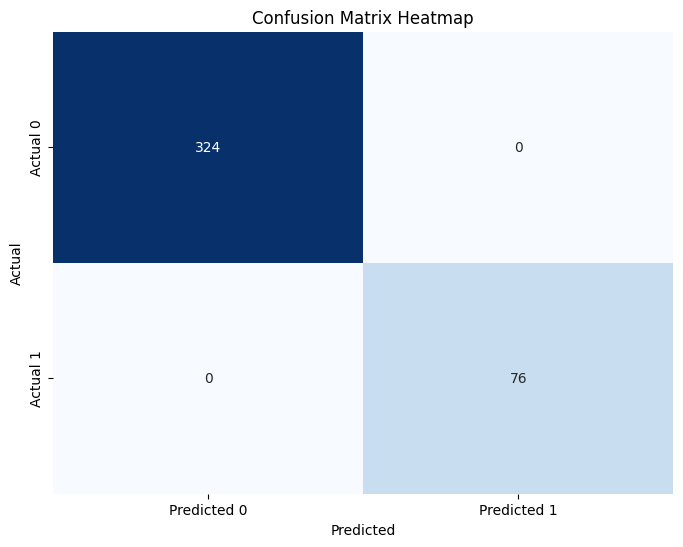

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()